# Evanescent Waveguide Couplers

Let's use the ANN and function library to formulate some evenescent waveguide couplers.

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import skrf as rf
import sys
from SiPANN import nn

INFO:tensorflow:Restoring parameters from /home/contagon/Documents/SiPANN/SiPANN/ANN/TIGHT_ANGLE_GAP/model
INFO:tensorflow:Restoring parameters from /home/contagon/Documents/SiPANN/SiPANN/ANN/TIGHT_ANGLE_STRAIGHT/model
INFO:tensorflow:Restoring parameters from /home/contagon/Documents/SiPANN/SiPANN/ANN/TIGHT_ANGLE_BENT_RAND/model


First, let's look at the coupler used in our RR designs.

In [2]:
# Set up input parameters (everythin is in microns)
wavelength    = np.squeeze(np.linspace(1.5,1.6,5000))
couplerLength = 2
gap           = 0.2
width         = 0.5
thickness     = 0.22

S = nn.evWGcoupler_S(wavelength,width,thickness,gap,couplerLength)

k = np.mean((np.abs(S[:,0,3])))
print(k)
(0.5 + k*np.sqrt(1-k**2)) / (0.5 - k*np.sqrt(1-k**2))

0.08703022823227866


1.4195500042922908

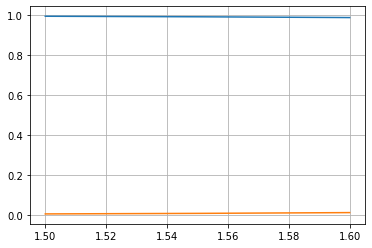

In [3]:
plt.figure()
plt.plot(wavelength,np.abs(S[:,0,1]) ** 2)
plt.plot(wavelength,np.abs(S[:,0,3]) ** 2)
plt.grid(True)
plt.show()

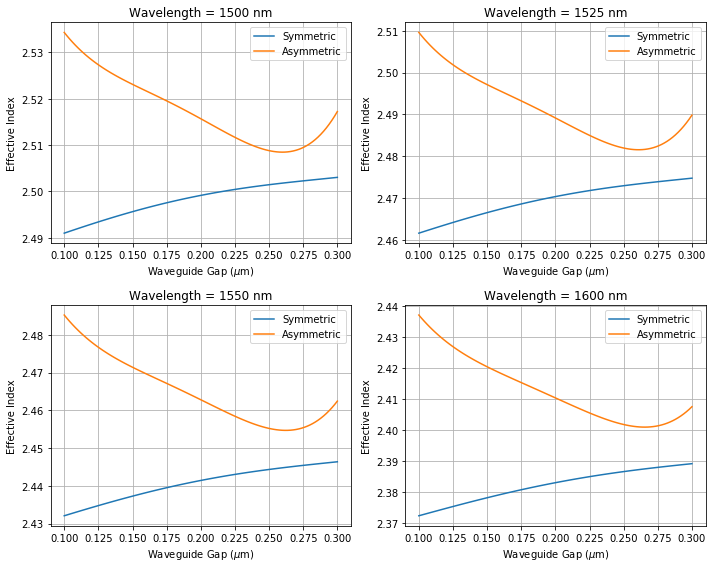

In [4]:
# All units are in microns
wavelength = np.array([1.5,1.525,1.55,1.6])
width      = 0.5
thickness  = 0.22
gap        = np.linspace(0.1,0.3,100)
derivative = 1
L     = 2
TE0,TE1 = nn.evWGcoupler(wavelength,width,thickness,gap)

k_2 = np.sin(np.pi/(2*L))

# Iterate through all the waveguide widths
plt.figure(figsize=(10, 8))
for k in range(wavelength.size):
    plt.subplot(2,2,k+1)
    plt.plot(gap,TE0[k,0,0,:],label='Symmetric')
    plt.plot(gap,TE1[k,0,0,:],label='Asymmetric')
    plt.grid(True)
    plt.title("Wavelength = {0:.0f} nm".format(wavelength[k]*1e3))
    plt.xlabel('Waveguide Gap ($\mu$m)')
    plt.ylabel('Effective Index')
    plt.legend()
plt.tight_layout()
plt.show()

Let's examine coupling as a function of gap distance

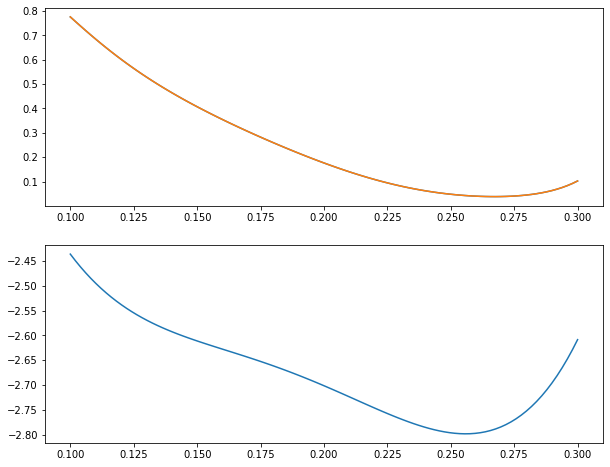

In [5]:
# All units are in microns
wavelength = 1.55
width      = 0.5
thickness  = 0.22
gap        = np.linspace(0.1,0.3,100)
derivative = 1

TE0,TE1    = nn.evWGcoupler(wavelength,width,thickness,gap)

couplerLength     = 10

n1    = np.squeeze(TE0)
n2    = np.squeeze(TE1)
dn = n1 - n2

Beta1 = 2*np.pi*n1 / wavelength
Beta2 = 2*np.pi*n2 / wavelength

E_A   = 1/np.sqrt(4) * (np.exp(1j*Beta1*couplerLength) + np.exp(1j*Beta2*couplerLength))
E_B   = 1/np.sqrt(4) * (np.exp(1j*Beta1*couplerLength) + np.exp(1j*Beta2*couplerLength - 1j*np.pi))

k = np.abs(np.sin(np.pi*dn/wavelength * couplerLength))

# Iterate through all the waveguide widths
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
plt.plot(gap,k**2)
plt.plot(gap,np.abs(E_B)**2)

plt.subplot(2,1,2)
plt.plot(gap,np.angle(E_B))
plt.show()